# Signate　Questの「民泊サービスにおける物件データを利用した宿泊価格予測モデルの作成」

## 必要ライブラリのインポート

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 参考
Kaggleのタイタニック号の予測問題
https://www.kaggle.com/mhmdsyed/titanic-survival-prediction-with-ml

In [3]:
import seaborn as sns 
import missingno as msno 
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn import svm
import warnings

In [5]:
df_train = pd.read_csv("train.csv") #, index_col="Id")
df_train.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode,y
0,0,6,"{TV,""Wireless Internet"",Kitchen,""Free parking ...",2.0,Real Bed,1.0,4.0,flexible,LA,t,...,-118.154761,The Penthouse,NaN,1,Apartment,60.0,Private room,NaN,90804,138.0
1,1,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,DC,t,...,-76.978190,Guest Bedroom in Brookland,Brookland,9,House,100.0,Private room,https://a0.muscache.com/im/pictures/e4d8b51f-6...,20018,42.0
2,2,2,"{TV,Internet,""Wireless Internet"",Kitchen,""Indo...",2.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.926240,Clean Modern Room in Lux Apt 1 Block From J Train,Bushwick,27,Apartment,83.0,Private room,https://a0.muscache.com/im/pictures/5ffecc9b-d...,NaN,65.0
3,3,2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,strict,SF,t,...,-122.411906,BEST views + reviews! 5/5 stars*****,Nob Hill,38,Apartment,95.0,Private room,NaN,94133,166.0
4,4,2,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.0,Real Bed,1.0,1.0,strict,NYC,t,...,-73.974691,Charming 1-bedroom - UWS Manhattan,Upper West Side,5,Apartment,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/92879730/5...,10024,165.0


In [6]:
warnings.filterwarnings('ignore')

In [13]:
print(df_train.columns.values)

['id' 'accommodates' 'amenities' 'bathrooms' 'bed_type' 'bedrooms' 'beds'
 'cancellation_policy' 'city' 'cleaning_fee' 'description' 'first_review'
 'host_has_profile_pic' 'host_identity_verified' 'host_response_rate'
 'host_since' 'instant_bookable' 'last_review' 'latitude' 'longitude'
 'name' 'neighbourhood' 'number_of_reviews' 'property_type'
 'review_scores_rating' 'room_type' 'thumbnail_url' 'zipcode' 'y']


In [7]:
df_test = pd.read_csv("test.csv")
df_test.head()

,id,accommodates,amenities,bathrooms,bed_type,bedrooms,beds,cancellation_policy,city,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,property_type,review_scores_rating,room_type,thumbnail_url,zipcode
0,0,6,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",2.0,Real Bed,2.0,2.0,strict,Boston,t,...,42.359278,-71.069962,Gorgeous 2BR/2BA Duplex in Beacon Hill,Beacon Hill,58,House,90.0,Entire home/apt,https://a0.muscache.com/im/pictures/7e4808b4-5...,02114
1,1,3,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,1.0,moderate,LA,t,...,34.084747,-118.367355,Luxury 1 Bedroom West Hollywood City Center,West Hollywood,4,Guesthouse,100.0,Entire home/apt,https://a0.muscache.com/im/pictures/5392fbd6-6...,90046
2,2,2,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",1.0,Real Bed,0.0,1.0,flexible,NYC,f,...,40.720541,-73.959192,Bedroom with Patio in Prime Williamsburg Locat...,Williamsburg,0,Apartment,NaN,Private room,https://a0.muscache.com/im/pictures/544d3b89-d...,11249.0
3,3,4,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",1.0,Real Bed,1.0,2.0,strict,NYC,f,...,40.681117,-73.944091,Cozy apartment in Brooklyn,Bedford-Stuyvesant,0,Apartment,NaN,Entire home/apt,https://a0.muscache.com/im/pictures/26baf7ba-0...,11216
4,4,3,"{TV,Internet,""Wireless Internet"",""Air conditio...",1.5,Real Bed,1.0,2.0,strict,LA,t,...,34.150995,-118.409359,"Cozy, sunny, pet friendly loft/apt",NaN,6,Loft,92.0,Entire home/apt,https://a0.muscache.com/im/pictures/86107545/9...,91604


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55583 entries, 0 to 55582
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      55583 non-null  int64  
 1   accommodates            55583 non-null  int64  
 2   amenities               55583 non-null  object 
 3   bathrooms               55436 non-null  float64
 4   bed_type                55583 non-null  object 
 5   bedrooms                55512 non-null  float64
 6   beds                    55487 non-null  float64
 7   cancellation_policy     55583 non-null  object 
 8   city                    55583 non-null  object 
 9   cleaning_fee            55583 non-null  object 
 10  description             55583 non-null  object 
 11  first_review            43675 non-null  object 
 12  host_has_profile_pic    55435 non-null  object 
 13  host_identity_verified  55435 non-null  object 
 14  host_response_rate      41879 non-null

infoを見る限りnullはなさそう。
Countが55583でないものは、なんらかの欠損がある

In [10]:
Y_test = pd.read_csv("sample_submit.csv")
Y_test.head()

,0,10
0,1,10
1,2,10
2,3,10
3,4,10
4,5,10


2つ目の要素に、予想される値段(y)をいれればよさそう

In [11]:
df_train.isnull().sum()

id                            0
accommodates                  0
amenities                     0
bathrooms                   147
bed_type                      0
bedrooms                     71
beds                         96
cancellation_policy           0
city                          0
cleaning_fee                  0
description                   0
first_review              11908
host_has_profile_pic        148
host_identity_verified      148
host_response_rate        13704
host_since                  148
instant_bookable              0
last_review               11880
latitude                      0
longitude                     0
name                          0
neighbourhood              5160
number_of_reviews             0
property_type                 0
review_scores_rating      12556
room_type                     0
thumbnail_url              6145
zipcode                     716
y                             0
dtype: int64

## Data Cleaning & Encoding

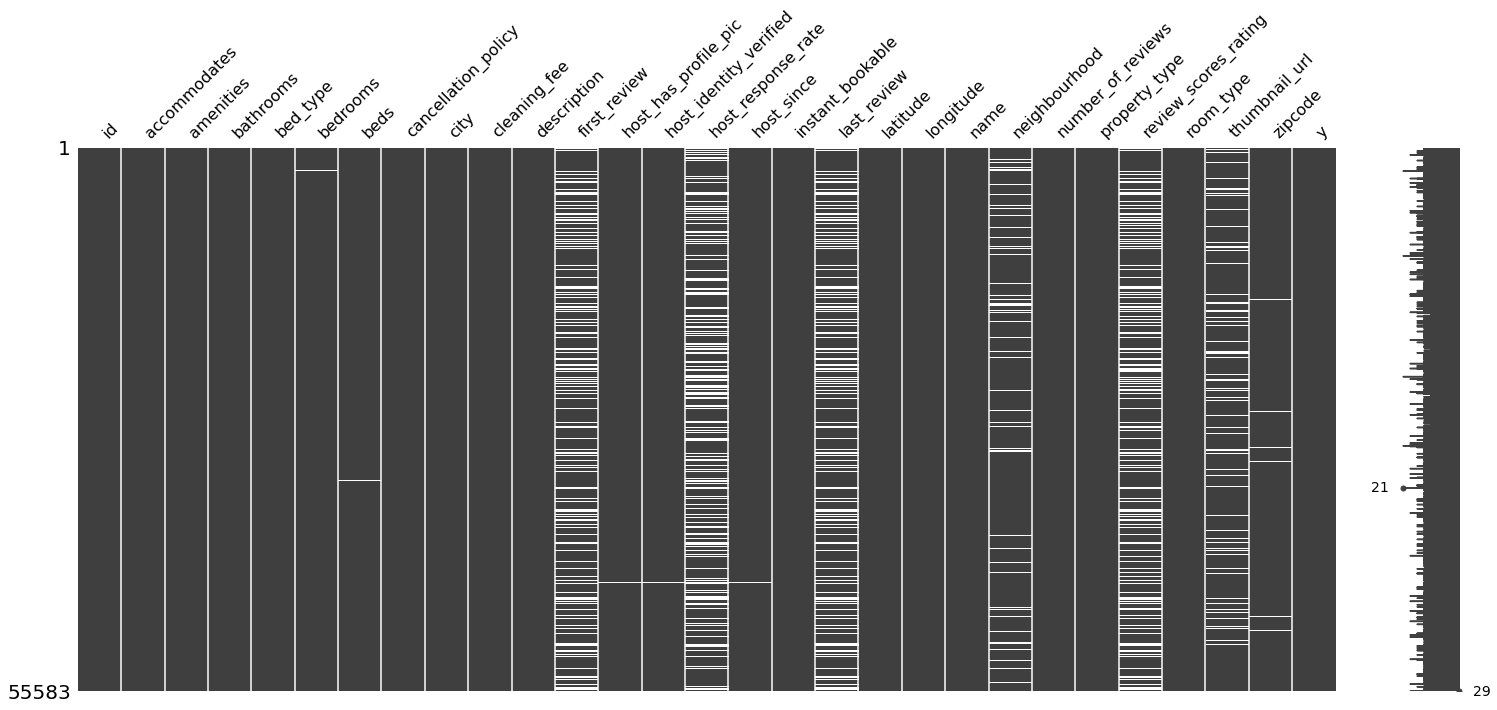

In [12]:
msno.matrix(df_train)
plt.show()